<a href="https://colab.research.google.com/github/SudhaR3096/Datascience/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sudhaaki","key":"664bab7a6195643e68fa03e8a323068d"}'}

In [2]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                   Apple Quality                                  170KB  2024-01-11 14:31:07          19260        427  1.0              
mikhail1681/walmart-sales                                        Walmart Sales                                  122KB  2024-02-13 17:35:56           2402         42  1.0              
beridzeg45/video-games                                           🎮Video Games Dataset                           756KB  2024-02-10 05:16:28           1355         40  1.0              
kapoorprakhar/college-placement-dataset                          College Placeme

In [5]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 92% 60.0M/65.2M [00:00<00:00, 135MB/s]
100% 65.2M/65.2M [00:00<00:00, 123MB/s]


In [6]:
! unzip /content/emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [7]:
train_path= "/content/train"
test_path= "/content/test"

In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [10]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.2, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [11]:
image_gen.flow_from_directory(train_path)

Found 28709 images belonging to 7 classes.


In [12]:
image_gen.flow_from_directory(test_path)

Found 7178 images belonging to 7 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [14]:
image_shape=(130,130,3)

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
batch_size = 16

In [19]:
train_data = image_gen.flow_from_directory(directory= "/content/train",
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                  )

Found 28709 images belonging to 7 classes.


In [20]:

test_data = image_gen.flow_from_directory(directory= "/content/test",
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                  )

Found 7178 images belonging to 7 classes.


In [21]:
train_data.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [22]:
hist = model.fit(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= test_data,
                           validation_steps= 8,
                           callbacks=[early_stop])

Epoch 1/30
10/10 [==============================] - 5s 447ms/step - loss: 1.9582 - accuracy: 0.2313 - val_loss: 1.8862 - val_accuracy: 0.2266
Epoch 2/30
10/10 [==============================] - 4s 403ms/step - loss: 1.8560 - accuracy: 0.1875 - val_loss: 1.8085 - val_accuracy: 0.3203
Epoch 3/30
10/10 [==============================] - 5s 554ms/step - loss: 1.8377 - accuracy: 0.2750 - val_loss: 1.8588 - val_accuracy: 0.2578
Epoch 4/30
10/10 [==============================] - 4s 404ms/step - loss: 1.8554 - accuracy: 0.2188 - val_loss: 1.7839 - val_accuracy: 0.3281
Epoch 5/30
10/10 [==============================] - 4s 439ms/step - loss: 1.8288 - accuracy: 0.2000 - val_loss: 1.8491 - val_accuracy: 0.2656
Epoch 6/30
10/10 [==============================] - 4s 402ms/step - loss: 1.9085 - accuracy: 0.1688 - val_loss: 1.8957 - val_accuracy: 0.1719


In [23]:
from tensorflow.keras.models import load_model
model.save('emotion_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
losses = pd.DataFrame(model.history.history)

<Axes: >

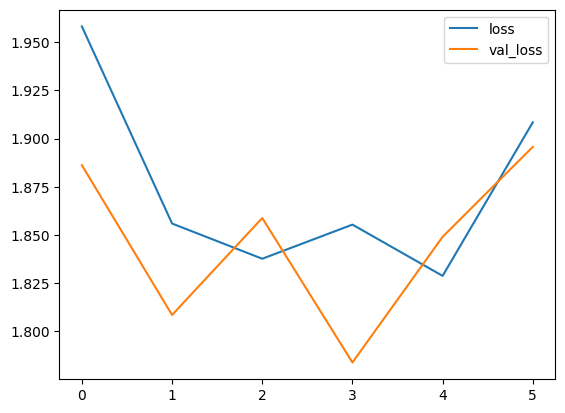

In [25]:
losses[['loss','val_loss']].plot()

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
predictions = model.predict(test_data)

449/449 [==============================] - 48s 108ms/step


In [29]:
predict_classes=np.argmax(predictions,axis=1)

In [30]:
predict_classes

array([4, 4, 5, ..., 5, 5, 5])

In [34]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 30ms/step
 the image is of sad


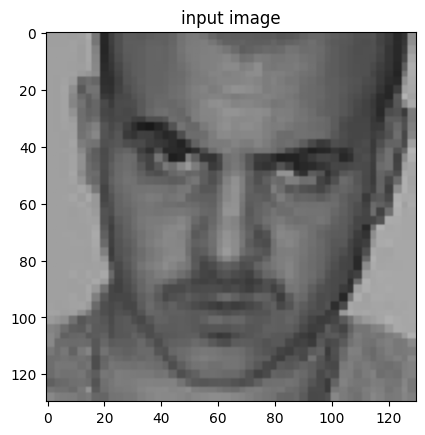

In [40]:
# path for the image to see if it predics correct class

path = "/content/test/angry/im103.png"
img = load_img(path, target_size=(130,130) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 50ms/step
 the image is of sad


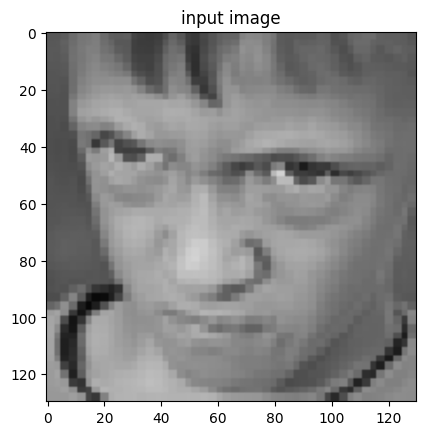

In [41]:
path = "/content/test/angry/im107.png"
img = load_img(path, target_size=(130,130) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()